# **FINAL GROUP PROJECT - INSY 695 - Enterprise Data Science**

# **Mobile Phone Price Prediction**

**USE CASE:** The aim of this project is to build a model to predict customer churn (that is, to predict which customers will cancel their subscriptions)

# FRAMING THE PROBLEM

More details about framing the problem....

## SETUP WORKBOOK

**IMPORT PACKAGES**

In [12]:
import pandas as pd
import numpy as np
!pip install pandas_profiling
#import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

#!pip install pyjanitor

import janitor as jn
from sklearn import (
    metrics,
    ensemble,
    model_selection,
    preprocessing,
    tree
)
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict
)

!pip install yellowbrick

from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC
)
from yellowbrick.model_selection import (
    LearningCurve 
)

In [67]:
import warnings
import gc
warnings.simplefilter(action='ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

**IMPORT DATA**

Source: Kaggle

Link: https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

In [38]:
url = "https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Churn-Analysis/main/data/E%20Commerce%20Dataset.csv"
df = pd.read_csv(url)

In [39]:
url2 = "https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Churn-Analysis/main/data/Data%20Dictionary.csv"
data_dict = pd.read_csv(url2)

In [40]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


**DATA DICTIONARY**

In [17]:
data_dict.head(10)
data_dict = data_dict.drop('Data', axis=1)
data_dict.style.set_properties(subset=['Discerption'], **{'width': '400px'})

,Variable,Discerption
0,CustomerID,Unique customer ID
1,Churn,Churn Flag
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spend on mobile application or website
9,NumberOfDeviceRegistered,Total number of deceives is registered on particular customer


In [18]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


# 1 - EXPLORATORY DATA ANALYSIS

## Data Exploration

In [19]:
df.shape

(5630, 20)

### Check datatypes

In [20]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

Number of each type of column

Text(0, 0.5, 'Data type')

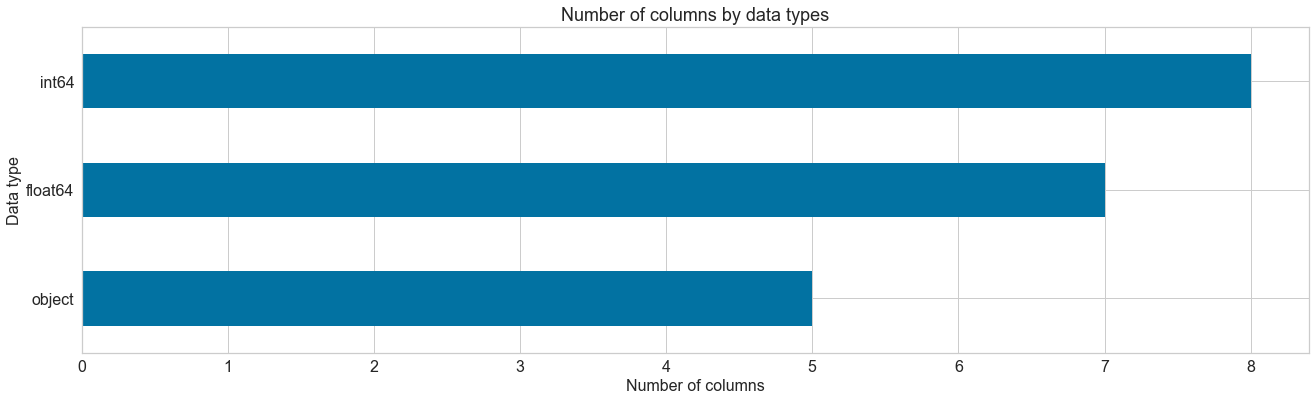

In [21]:

df.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(22, 6),
                                            fontsize=16)

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

Numerical Data:

Categorical Data:

### Check the column names

In [22]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

### Summary Statistics

In [23]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


### Pandas Profiling

In [ ]:
#Generate a HTML report
profile = df.profile_report(title='Pandas Profiling Report')
#profile

profile.to_file(output_file="profile_report_output.html")

Notes from pandas profiling report:

### Check for missing values

In [25]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

# Missing values statistics
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 20 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
DaySinceLastOrder,307,5.5
OrderAmountHikeFromlastYear,265,4.7
Tenure,264,4.7
OrderCount,258,4.6
CouponUsed,256,4.5
HourSpendOnApp,255,4.5
WarehouseToHome,251,4.5


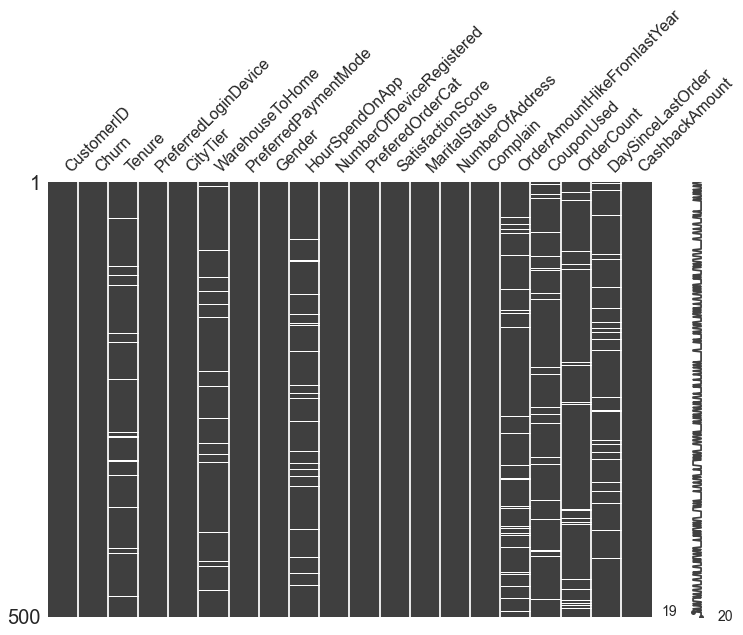

In [28]:
import missingno as msno
msno.matrix(df.sample(500), figsize=(12,8))
#msno.heatmap(df, figsize=(8, 8))

### Target Variable

In [41]:
df['Churn'].unique()

array([1, 0], dtype=int64)

### Check the distribution of 'Churn'

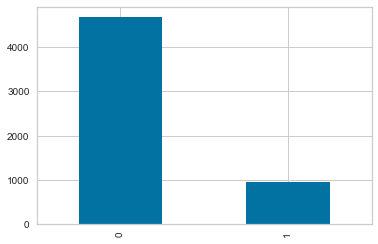

In [42]:
df['Churn'].value_counts().plot(kind='bar')

**NOTE: We see signs of imbalanced data**

### Correlations between predictors and target variable

Drop 'CustomerID'

In [43]:
df = df.drop(['CustomerID'], axis=1)

In [44]:
corr = df.corr()['Churn'].sort_values()

# Display correlations
print('8 Positive Correlations:')
print('-----------------------------------')
print(corr.tail(8))
print('\n7 Negative Correlations:')
print('------------------------------')
print(corr.head(7))

8 Positive Correlations:
-----------------------------------
HourSpendOnApp              0.018675
NumberOfAddress             0.043931
WarehouseToHome             0.076630
CityTier                    0.084703
SatisfactionScore           0.105481
NumberOfDeviceRegistered    0.107939
Complain                    0.250188
Churn                       1.000000
Name: Churn, dtype: float64

7 Negative Correlations:
------------------------------
Tenure                        -0.349408
DaySinceLastOrder             -0.160757
CashbackAmount                -0.154161
OrderCount                    -0.028697
OrderAmountHikeFromlastYear   -0.010058
CouponUsed                    -0.008264
HourSpendOnApp                 0.018675
Name: Churn, dtype: float64


In [45]:
corr

Tenure                        -0.349408
DaySinceLastOrder             -0.160757
CashbackAmount                -0.154161
OrderCount                    -0.028697
OrderAmountHikeFromlastYear   -0.010058
CouponUsed                    -0.008264
HourSpendOnApp                 0.018675
NumberOfAddress                0.043931
WarehouseToHome                0.076630
CityTier                       0.084703
SatisfactionScore              0.105481
NumberOfDeviceRegistered       0.107939
Complain                       0.250188
Churn                          1.000000
Name: Churn, dtype: float64

We can see that no predictors are highly correlated with the target

## Data Visualization

Types of graphs to create:
- 

### Pair plots across Churn

C:\Users\e_wor\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


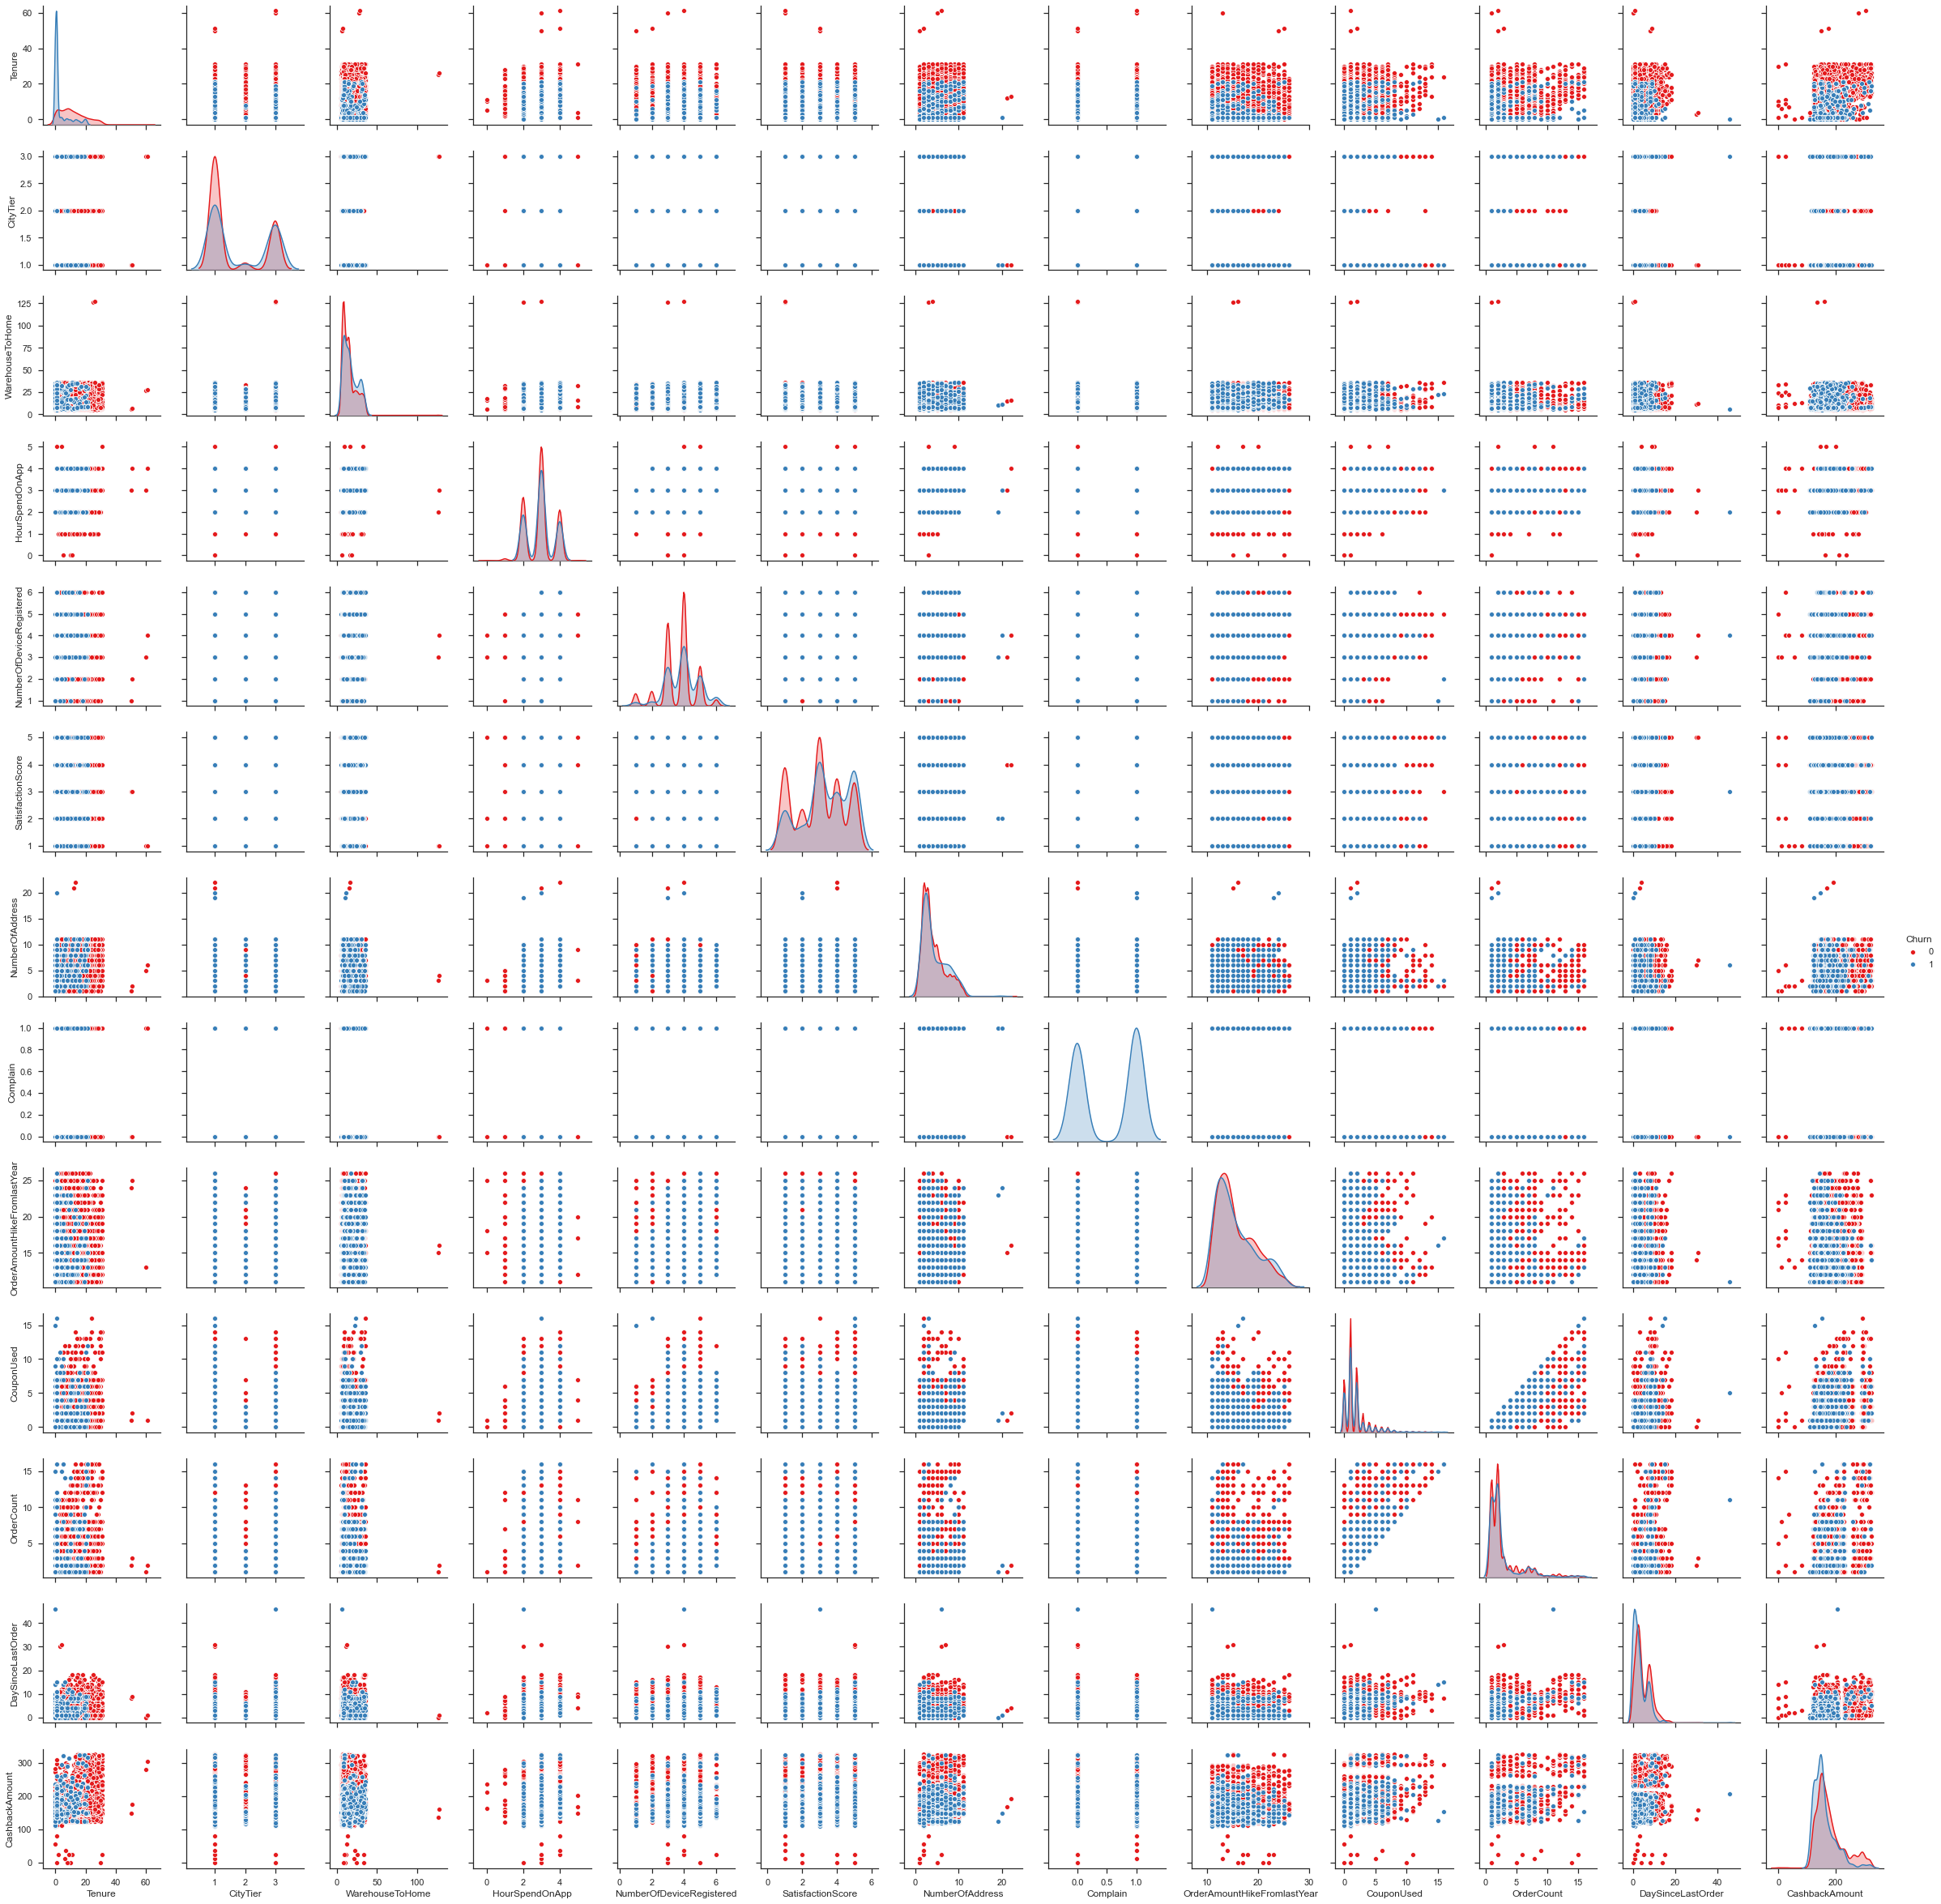

In [47]:
sns.set(style="ticks")

sns.pairplot(df, hue="Churn", palette="Set1")
plt.show()


###Specify which variables you want to see

#new_df = df.copy()
#vars = ["Variable 1", "Variable 2", "Variable 3"]
#p = pairplot(
#    new_df, vars=vars, hue="Churn", kind="reg"
#)

### Distribution of numerical variables

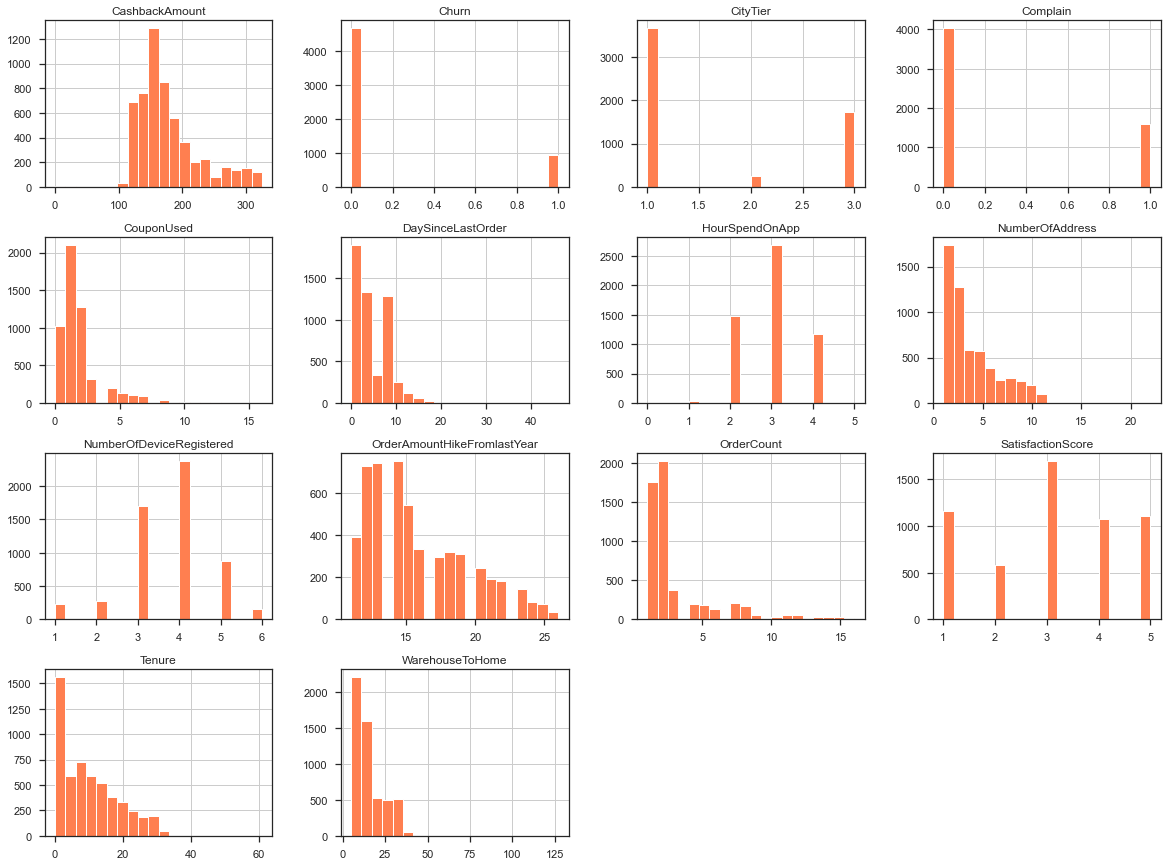

In [48]:
df.hist(bins=20, figsize=(20,15), color='coral')
plt.show();

### Distribution of Categorical Variables

Number of categories in each categorical variable

In [49]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

PreferredLoginDevice    3
PreferredPaymentMode    7
Gender                  2
PreferedOrderCat        6
MaritalStatus           3
dtype: int64

In [50]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Grid of boxplots of the categorical variables vs price_range

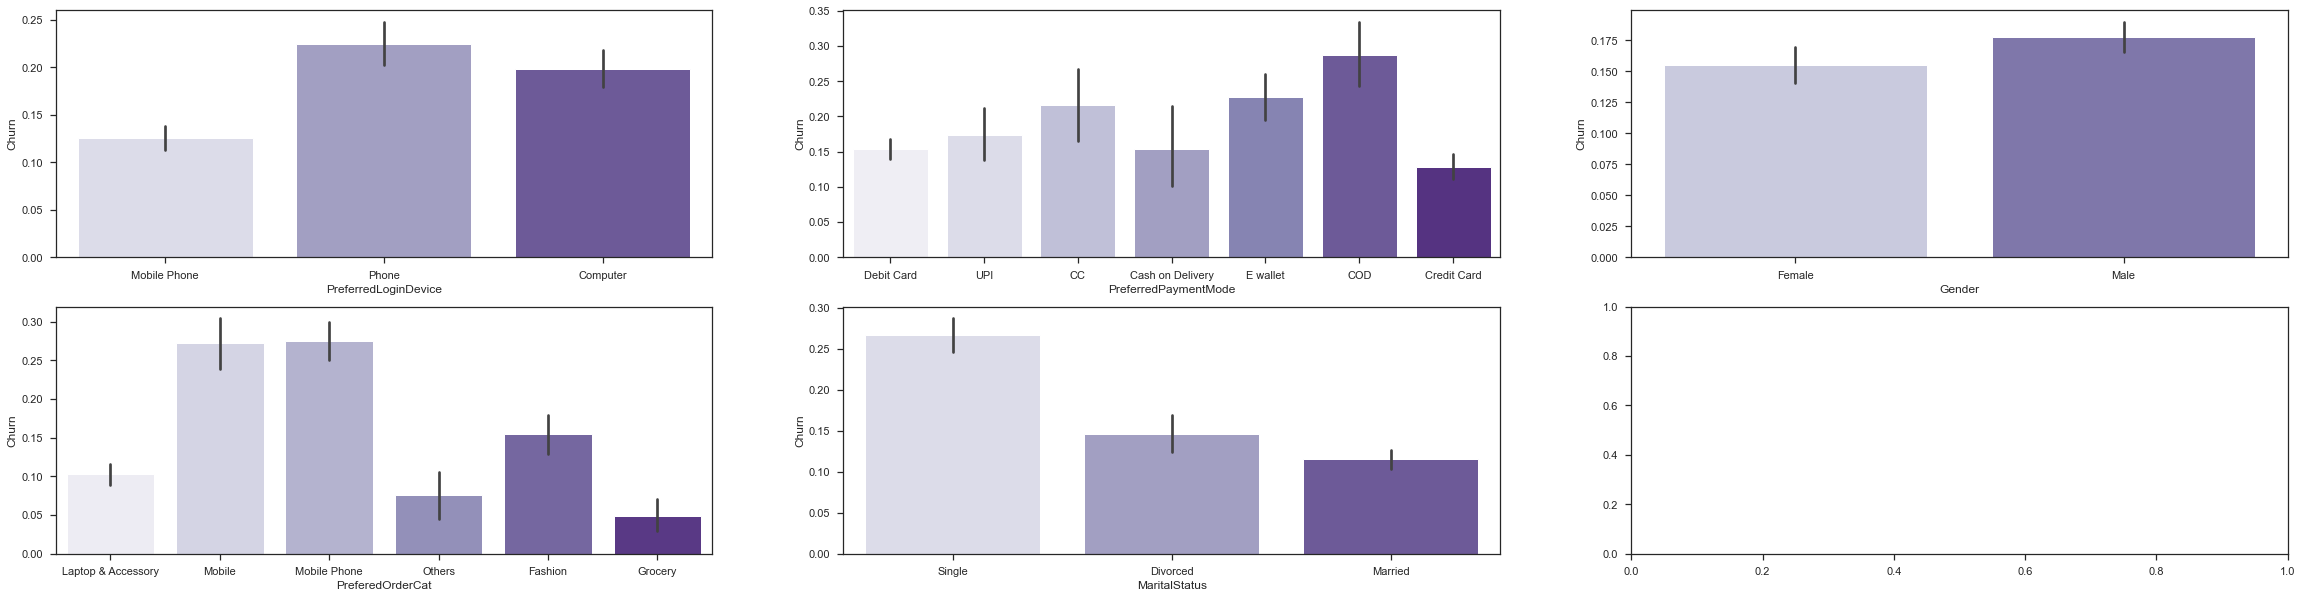

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(40,10))
axes = axes.flatten()

ax = sns.barplot(x ='PreferredLoginDevice', y ='Churn', data = df, palette = 'Purples', orient='v', ax=axes[0])
ax = sns.barplot(x ='PreferredPaymentMode', y ='Churn', data = df, palette = 'Purples', orient='v', ax=axes[1])
ax = sns.barplot(x ='Gender', y ='Churn', data = df, palette = 'Purples', orient='v', ax=axes[2])
ax = sns.barplot(x ='PreferedOrderCat', y ='Churn', data = df, palette = 'Purples', orient='v', ax=axes[3])
ax = sns.barplot(x ='MaritalStatus', y ='Churn', data = df, palette = 'Purples', orient='v', ax=axes[4])

### Data Cleaning

**INFORMATION LEAKAGE**

Should we consider this? Perhaps 'Satisfaction Score' could be leaking information?

# 2 - DATA PREPARATION

### Categorical Encoding

One-Hot encoding the categorical variables

In [52]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [53]:
df = pd.get_dummies(df, columns=['PreferredLoginDevice','CityTier', 'PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain'])

In [54]:
df.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_0,Complain_1
0,1,4.0,6.0,3.0,3,2,9,11.0,1.0,1.0,...,0,1,0,0,0,0,0,1,0,1
1,1,NaN,8.0,3.0,4,3,7,15.0,0.0,1.0,...,0,0,1,0,0,0,0,1,0,1
2,1,NaN,30.0,2.0,4,3,6,14.0,0.0,1.0,...,0,0,1,0,0,0,0,1,0,1
3,1,0.0,15.0,2.0,4,5,8,23.0,0.0,1.0,...,0,1,0,0,0,0,0,1,1,0
4,1,0.0,12.0,NaN,3,5,3,11.0,1.0,1.0,...,0,0,1,0,0,0,0,1,1,0


In [55]:
df.dtypes

Churn                                      int64
Tenure                                   float64
WarehouseToHome                          float64
HourSpendOnApp                           float64
NumberOfDeviceRegistered                   int64
SatisfactionScore                          int64
NumberOfAddress                            int64
OrderAmountHikeFromlastYear              float64
CouponUsed                               float64
OrderCount                               float64
DaySinceLastOrder                        float64
CashbackAmount                             int64
PreferredLoginDevice_Computer              uint8
PreferredLoginDevice_Mobile Phone          uint8
PreferredLoginDevice_Phone                 uint8
CityTier_1                                 uint8
CityTier_2                                 uint8
CityTier_3                                 uint8
PreferredPaymentMode_CC                    uint8
PreferredPaymentMode_COD                   uint8
PreferredPaymentMode

Clean column names

In [56]:
def clean_col(name):
    return (
        name.strip().replace(" ", "")
    )

df = df.rename(columns=clean_col)
df.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop&Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_MobilePhone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_0,Complain_1
0,1,4.0,6.0,3.0,3,2,9,11.0,1.0,1.0,...,0,1,0,0,0,0,0,1,0,1
1,1,NaN,8.0,3.0,4,3,7,15.0,0.0,1.0,...,0,0,1,0,0,0,0,1,0,1
2,1,NaN,30.0,2.0,4,3,6,14.0,0.0,1.0,...,0,0,1,0,0,0,0,1,0,1
3,1,0.0,15.0,2.0,4,5,8,23.0,0.0,1.0,...,0,1,0,0,0,0,0,1,1,0
4,1,0.0,12.0,NaN,3,5,3,11.0,1.0,1.0,...,0,0,1,0,0,0,0,1,1,0


We will split the data into Train, Test and Validation sets, so that when we pre-process we do not leak information to the test and validation sets

### Correlations

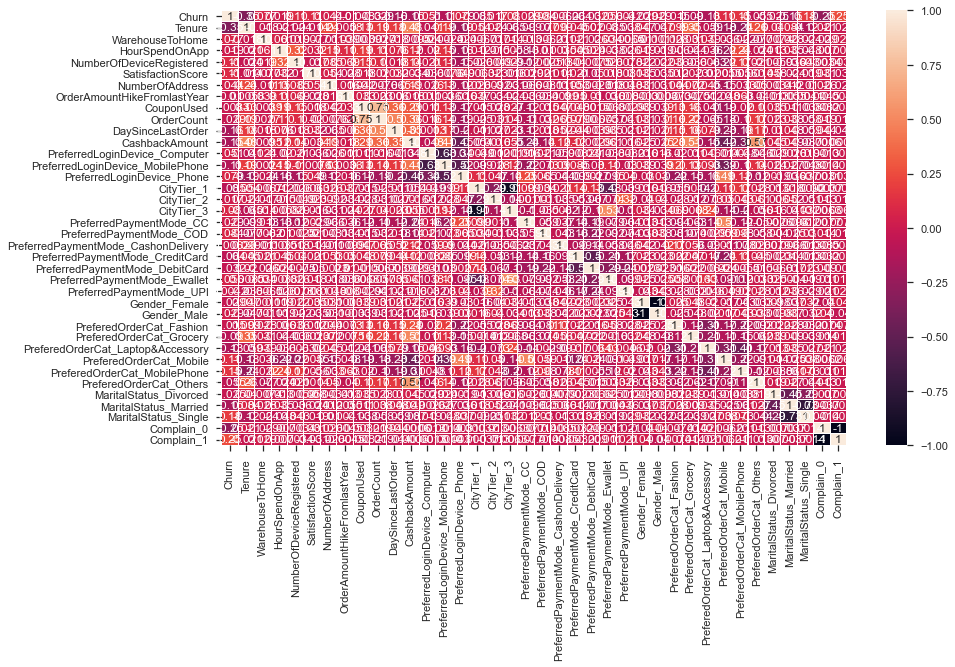

In [57]:
import seaborn as sns

plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot = True,  linewidths=.05) #could add  cmap="Purples" to change the colors 
plt.show()

Negative correlation between Gender_Female and Gender_Male (-1)
Negative correlation between Complain_0 and Complain_1 (-1)
Negative correlatio between CityTier_1 and CityTier_3 (0.9)

In [130]:
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
sol

Complain_0                     Complain_1              1.000000
Gender_Female                  Gender_Male             1.000000
CityTier_1                     CityTier_3              0.906911
CouponUsed                     OrderCount              0.745245
MaritalStatus_Married          MaritalStatus_Single    0.727346
                                                         ...   
CityTier_1                     Complain_0              0.000373
                               Complain_1              0.000373
OrderAmountHikeFromlastYear    Gender_Female           0.000299
                               Gender_Male             0.000299
PreferredLoginDevice_Computer  CityTier_3              0.000189
Length: 703, dtype: float64

Remove Correlated Variables

In [131]:
#drop complain_0, Gender_Male, and CityTier_3
            

### Feature Selection

### TRAIN-TEST-VAL Split

In [59]:
#X, y = jn.ml.get_features_targets(df, target_columns="Churn")

train(70%) , test(30%) split

In [60]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42)

test(50%) val(50%) split

In [61]:
from sklearn.model_selection import train_test_split

test, val = train_test_split(test, test_size=0.5, random_state=42)

In [62]:
print(len(train))
print(len(test))
print(len(val))

3941
844
845


### Fill in Missing Values


In [63]:
train.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop&Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_MobilePhone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_0,Complain_1
1559,1,0.0,NaN,2.0,3,5,6,11.0,0.0,1.0,...,0,0,1,0,0,0,0,1,0,1
993,0,NaN,9.0,2.0,3,1,2,21.0,1.0,1.0,...,0,0,1,0,0,0,1,0,1,0
1187,1,0.0,24.0,NaN,1,5,1,17.0,1.0,1.0,...,0,0,1,0,0,0,1,0,1,0
188,0,6.0,11.0,3.0,3,4,7,11.0,2.0,8.0,...,0,0,0,0,0,1,0,0,1,0
4630,0,1.0,31.0,3.0,4,1,2,14.0,2.0,3.0,...,0,0,0,1,0,0,1,0,1,0


In [68]:
train['DaySinceLastOrder'] = train['DaySinceLastOrder'].fillna(train['DaySinceLastOrder'].median())
train['OrderAmountHikeFromlastYear'] = train['OrderAmountHikeFromlastYear'].fillna(train['OrderAmountHikeFromlastYear'].median())
train['Tenure'] = train['Tenure'].fillna(train['Tenure'].median())
train['OrderCount'] = train['OrderCount'].fillna(train['OrderCount'].median())
train['CouponUsed'] = train['CouponUsed'].fillna(train['CouponUsed'].median())
train['HourSpendOnApp'] = train['HourSpendOnApp'].fillna(train['HourSpendOnApp'].median())
train['WarehouseToHome'] = train['WarehouseToHome'].fillna(train['WarehouseToHome'].median())

test['DaySinceLastOrder'] = test['DaySinceLastOrder'].fillna(test['DaySinceLastOrder'].median())
test['OrderAmountHikeFromlastYear'] = test['OrderAmountHikeFromlastYear'].fillna(test['OrderAmountHikeFromlastYear'].median())
test['Tenure'] = test['Tenure'].fillna(test['Tenure'].median())
test['OrderCount'] = test['OrderCount'].fillna(test['OrderCount'].median())
test['CouponUsed'] = test['CouponUsed'].fillna(test['CouponUsed'].median())
test['HourSpendOnApp'] = test['HourSpendOnApp'].fillna(test['HourSpendOnApp'].median())
test['WarehouseToHome'] = test['WarehouseToHome'].fillna(test['WarehouseToHome'].median())

val['DaySinceLastOrder'] = val['DaySinceLastOrder'].fillna(val['DaySinceLastOrder'].median())
val['OrderAmountHikeFromlastYear'] = val['OrderAmountHikeFromlastYear'].fillna(val['OrderAmountHikeFromlastYear'].median())
val['Tenure'] = val['Tenure'].fillna(val['Tenure'].median())
val['OrderCount'] = val['OrderCount'].fillna(val['OrderCount'].median())
val['CouponUsed'] = val['CouponUsed'].fillna(val['CouponUsed'].median())
val['HourSpendOnApp'] = val['HourSpendOnApp'].fillna(val['HourSpendOnApp'].median())
val['WarehouseToHome'] = val['WarehouseToHome'].fillna(val['WarehouseToHome'].median())

In [69]:
# Re-check for missing values
miss_values_train = missing_values(train)
miss_values_test = missing_values(train)
miss_values_val = missing_values(train)

print(miss_values_train)
print(miss_values_test)
print(miss_values_val)

Dataframe has 38 columns.
There are 0 columns that have missing values.
Dataframe has 38 columns.
There are 0 columns that have missing values.
Dataframe has 38 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


### Outlier Treatment

Find outliers on the train set

Text(0, 0.5, 'Values')

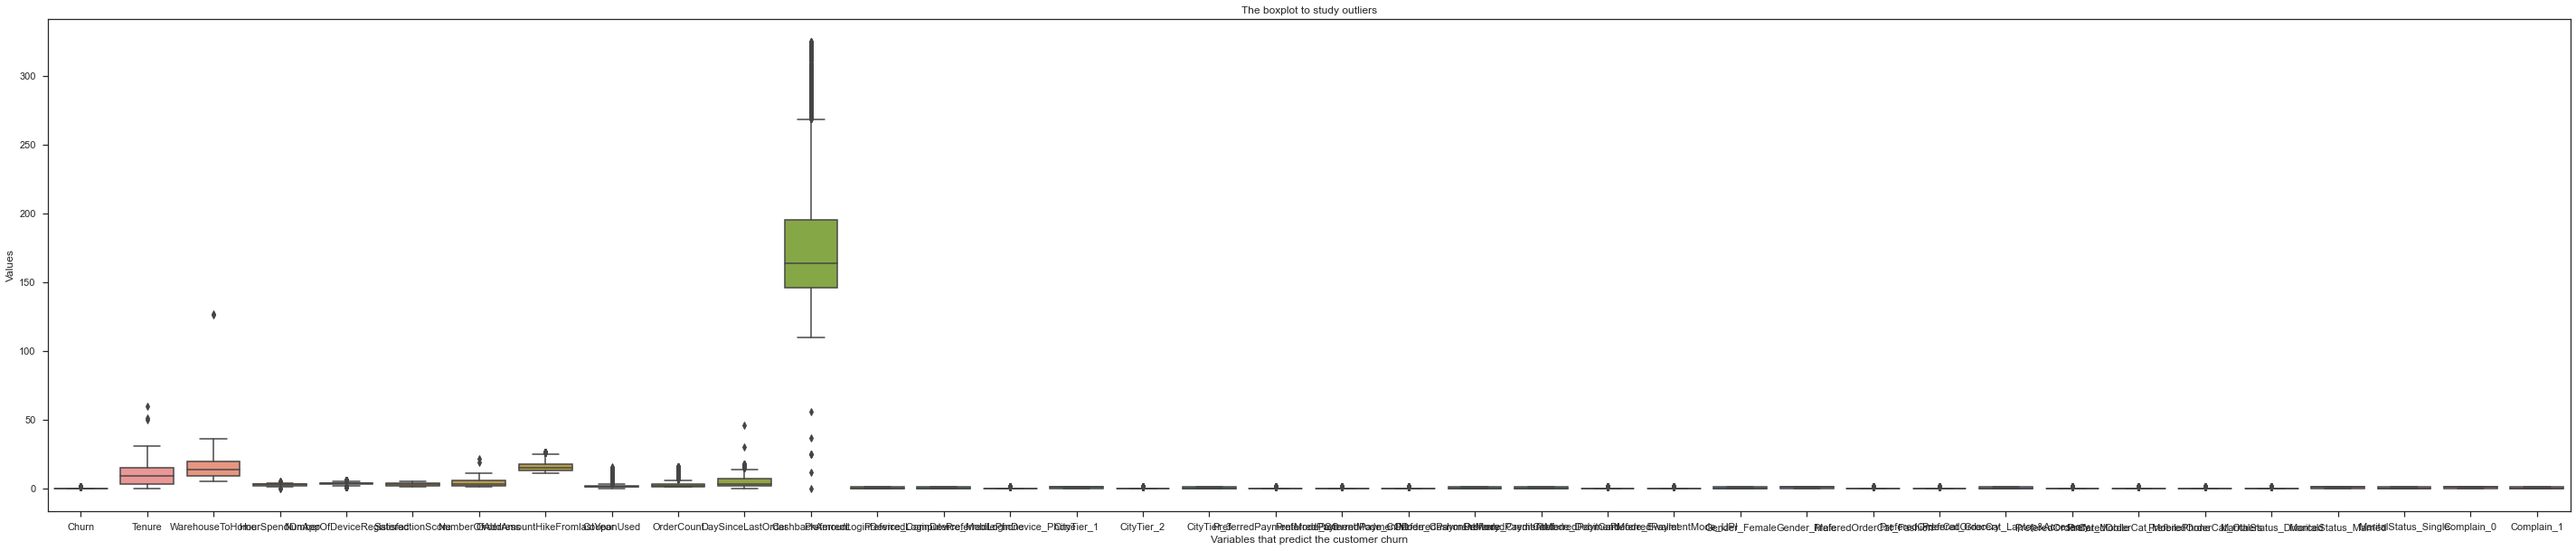

In [70]:
plt.figure(figsize=(50,10))
sns.boxplot(data=train)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

Quite a lot of outliers, espcially with 'CashbackAmount'

In [71]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
pred = iforest.fit_predict(train)
score = iforest.decision_function(train)

from numpy import where
anom_index = where(pred== -1)
values = train.iloc[anom_index]
values

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop&Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_MobilePhone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_0,Complain_1
1187,1,0.0,24.0,3.0,1,5,1,17.0,1.0,1.0,...,0,0,1,0,0,0,1,0,1,0
627,1,0.0,22.0,3.0,1,5,2,16.0,15.0,15.0,...,0,0,1,0,0,0,0,1,1,0
3684,0,26.0,35.0,3.0,2,3,4,12.0,1.0,2.0,...,1,0,0,0,0,1,0,0,0,1
1695,0,15.0,8.0,3.0,3,3,1,11.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,1
869,0,25.0,34.0,2.0,1,3,3,11.0,0.0,2.0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0,15.0,8.0,3.0,3,3,1,11.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,1
3234,0,21.0,10.0,3.0,4,3,11,13.0,1.0,12.0,...,1,0,0,0,0,0,1,0,0,1
3991,0,31.0,9.0,3.0,4,4,6,23.0,11.0,15.0,...,1,0,0,0,0,0,1,0,1,0
3748,1,1.0,31.0,3.0,5,4,2,24.0,3.0,11.0,...,0,1,0,0,0,0,0,1,0,1


Out of 3941 observations, there are 79 outliers. **We will remove the outliers**

In [73]:
train = train[~train.index.isin(values.index)]
train.shape

(3862, 38)

### Separate Features and Targets

Separate in train, test and val sets

In [74]:
y_train = train['Churn']
X_train = train.drop(columns=['Churn'])

y_test = test['Churn']
X_test = test.drop(columns=['Churn'])

y_val = val['Churn']
X_val = val.drop(columns=['Churn'])

In [75]:
X_train.columns

Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_MobilePhone', 'PreferredLoginDevice_Phone',
       'CityTier_1', 'CityTier_2', 'CityTier_3', 'PreferredPaymentMode_CC',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_CashonDelivery',
       'PreferredPaymentMode_CreditCard', 'PreferredPaymentMode_DebitCard',
       'PreferredPaymentMode_Ewallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop&Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_MobilePhone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Complain_0',
       'Complain_1'],
   

### Baseline Model Classifier

In [76]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

DummyClassifier()

Accuracy

In [78]:
dummy_clf.score(X_val, y_val)

0.744378698224852

Precision

In [80]:
print(metrics.confusion_matrix(y_val, dummy_clf.predict(X_val)))

[[593 122]
 [106  24]]


In [81]:
print(metrics.classification_report(dummy_clf.predict(X_val), y_val, digits=3))

              precision    recall  f1-score   support

           0      0.829     0.854     0.842       694
           1      0.223     0.192     0.206       151

    accuracy                          0.736       845
   macro avg      0.526     0.523     0.524       845
weighted avg      0.721     0.736     0.728       845



### Standardize the Data

In [82]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

### Evaluation Metrics

ROC Curves

In [83]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

PR Curve

In [84]:
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

Classification Score

In [86]:
def clf_score(clf, X_train, y_train, X_val, y_val, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))
        
        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_val, clf.predict(X_val))))
        plot_confusion_matrix(clf,  X_val, clf.predict(X_val))
        print("End of validation Result\n")

Classification Metrics

In [87]:
def evaluation_metrics(y_actual, y_pred):
            
        precision, recall, _ = precision_recall_curve(y_actual, y_pred)
        average_precision = average_precision_score(y_actual, y_pred)
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_actual, y_pred)
        roc_auc = roc_auc_score(y_actual, y_pred)
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_actual, y_pred)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_actual, y_pred)))

### Dealing with Imbalanced Data

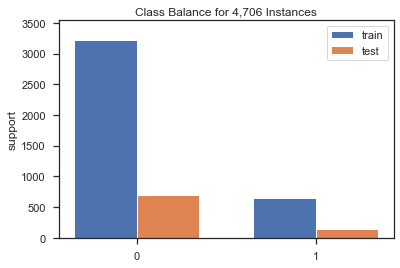

In [88]:
from yellowbrick.target import ClassBalance

# Instantiate the visualizer
visualizer = ClassBalance(labels=[0, 1])

visualizer.fit(y_train, y_test)        # Fit the data to the visualizer
visualizer.show()  

The resulting figure allows us to diagnose the severity of the balance issue. In this figure we can see that the "0" class dominates the "1" class. 

Oversampling

In [90]:
print('Before OverSampling, the shape of X: {}'.format(X_train.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y_train.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, the shape of X: (3862, 37)
Before OverSampling, the shape of y: (3862,) 

Before OverSampling, counts of label '1': 644
Before OverSampling, counts of label '0': 3218


In [93]:
#!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)
pd.Series(y_train_ros).value_counts()

1    3218
0    3218
Name: Churn, dtype: int64

In [95]:
print('After OverSampling, the shape of X: {}'.format(X_train_ros.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_train_ros.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_ros == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_ros == 0)))

After OverSampling, the shape of X: (6436, 37)
After OverSampling, the shape of y: (6436,) 

After OverSampling, counts of label '1': 3218
After OverSampling, counts of label '0': 3218


In [96]:
X_train_ros

array([[-1.20857049, -0.18172555, -1.33928111, ...,  1.45673248,
        -1.60806925,  1.60806925],
       [-0.12554027, -0.77629015, -1.33928111, ..., -0.68646784,
         0.62186376, -0.62186376],
       [-0.48655034, -0.53846431,  0.0848113 , ..., -0.68646784,
         0.62186376, -0.62186376],
       ...,
       [-0.12554027,  0.29392614,  0.0848113 , ..., -0.68646784,
         0.62186376, -0.62186376],
       [-0.12554027,  0.0561003 , -1.33928111, ...,  1.45673248,
         0.62186376, -0.62186376],
       [-1.0882338 , -0.65737723,  0.0848113 , ..., -0.68646784,
        -1.60806925,  1.60806925]])

ANOTHER METHOD: SMOTE

In [97]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
pd.Series(y_train_sm).value_counts()

1    3218
0    3218
Name: Churn, dtype: int64

Turning array into a dataframe

In [102]:
df_X = df.drop(['Churn'], axis=1)
cols = list(df_X)

X_train_ros=pd.DataFrame(X_train_ros)
X_train_ros.columns=cols
#Renaming column name of Target variable
y_train_ros=pd.DataFrame(y_train_ros)
y_train_ros.columns = ['Churn_1']
scaled_train_df = pd.concat([X_train_ros,y_train_ros], axis=1)
scaled_train_df

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,...,PreferedOrderCat_Laptop&Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_MobilePhone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_0,Complain_1,Churn_1
0,-1.208570,-0.181726,-1.339281,-0.690789,1.410579,0.715396,-1.304118,-0.946592,-0.686163,-0.107981,...,-0.767233,2.451341,-0.551225,-0.21126,-0.409234,-1.075331,1.456732,-1.608069,1.608069,1
1,-0.125540,-0.776290,-1.339281,-0.690789,-1.489810,-0.856196,1.473417,-0.391599,-0.686163,-1.240430,...,-0.767233,2.451341,-0.551225,-0.21126,-0.409234,0.929946,-0.686468,0.621864,-0.621864,0
2,-0.486550,-0.538464,0.084811,-0.690789,0.685482,1.108294,-1.304118,0.163394,1.802396,-0.391093,...,-0.767233,-0.407940,-0.551225,-0.21126,2.443587,-1.075331,-0.686468,0.621864,-0.621864,0
3,-1.088234,1.839794,0.084811,0.295469,-1.489810,-0.856196,-0.470858,0.163394,0.024854,-0.674206,...,-0.767233,-0.407940,1.814142,-0.21126,-0.409234,0.929946,-0.686468,0.621864,-0.621864,0
4,-1.088234,0.175013,0.084811,0.295469,-1.489810,-0.463298,-0.470858,0.163394,-0.330654,-0.391093,...,1.303385,-0.407940,-0.551225,-0.21126,-0.409234,-1.075331,1.456732,0.621864,-0.621864,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6431,-1.088234,-0.657377,0.084811,1.281726,-0.764713,-0.463298,-1.026364,1.273380,0.380363,-0.391093,...,-0.767233,-0.407940,-0.551225,-0.21126,2.443587,-1.075331,-0.686468,-1.608069,1.608069,1
6432,-0.847560,-0.300638,1.508904,0.295469,1.410579,1.894090,1.751170,0.163394,0.024854,-0.391093,...,-0.767233,-0.407940,1.814142,-0.21126,2.443587,-1.075331,-0.686468,-1.608069,1.608069,1
6433,-0.125540,0.293926,0.084811,0.295469,1.410579,-0.856196,0.640156,-0.391599,-0.686163,-1.240430,...,-0.767233,2.451341,-0.551225,-0.21126,-0.409234,0.929946,-0.686468,0.621864,-0.621864,1
6434,-0.125540,0.056100,-1.339281,0.295469,1.410579,-0.856196,-0.748611,-0.946592,-0.686163,-1.240430,...,-0.767233,-0.407940,1.814142,-0.21126,-0.409234,-1.075331,1.456732,0.621864,-0.621864,1


# 3 - MODELLING


### Dummy Classifier

In [104]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier()
clf_dummy.fit(X_train_ros, y_train_ros)

DummyClassifier()

Validation Result:

accuracy score: 0.4870



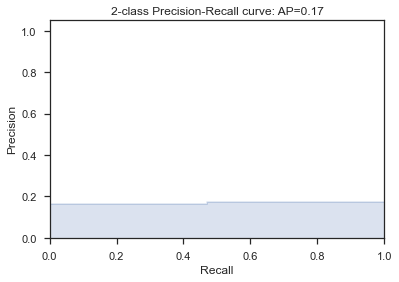

roc auc score: 0.5308420896847713



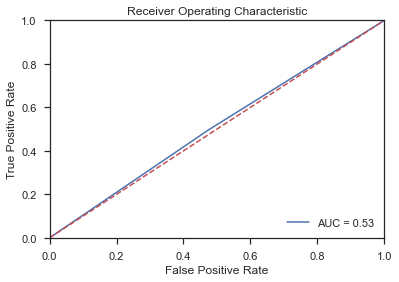

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.47      0.60       699
           1       0.18      0.55      0.27       145

    accuracy                           0.48       844
   macro avg       0.51      0.51      0.43       844
weighted avg       0.72      0.48      0.54       844


Confusion Matrix: 
 [[357 342]
 [ 67  78]]

End of validation Result



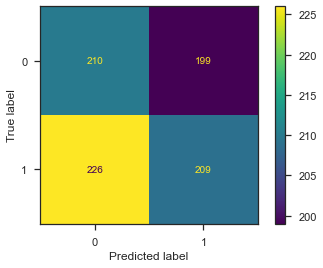

In [105]:
clf_score(clf_dummy, X_train_ros, y_train_ros, X_test, y_test, train=False)

### Logistic Regression

Validation Result:

accuracy score: 0.7678



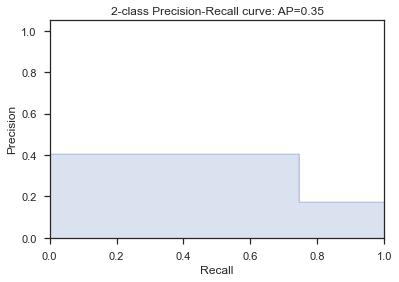

roc auc score: 0.7586798875240492



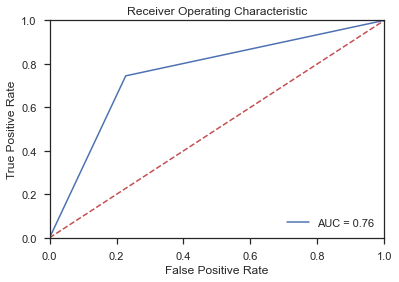

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.77      0.85       699
           1       0.40      0.74      0.52       145

    accuracy                           0.77       844
   macro avg       0.67      0.76      0.69       844
weighted avg       0.84      0.77      0.79       844


Confusion Matrix: 
 [[540 159]
 [ 37 108]]

End of validation Result



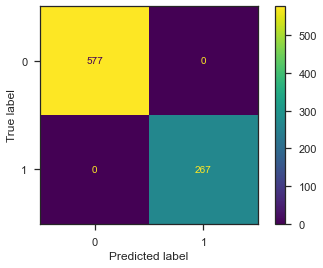

In [107]:
from sklearn.linear_model import LogisticRegression

clf_log_reg = LogisticRegression(C=0.0001, random_state=42, max_iter=1000)
clf_log_reg.fit(X_train_ros, y_train_ros)

clf_score(clf_log_reg, X_train_ros, y_train_ros, X_test, y_test, train=False)

### Random Forest

Validation Result:

accuracy score: 0.9597



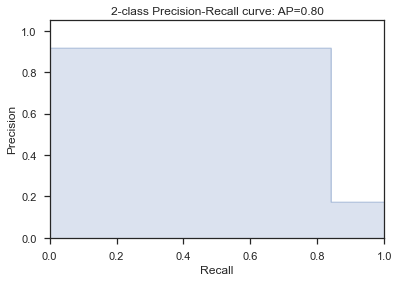

roc auc score: 0.9128212717675497



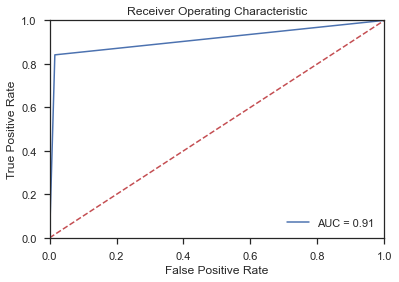

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       699
           1       0.92      0.84      0.88       145

    accuracy                           0.96       844
   macro avg       0.94      0.91      0.93       844
weighted avg       0.96      0.96      0.96       844


Confusion Matrix: 
 [[688  11]
 [ 23 122]]

End of validation Result



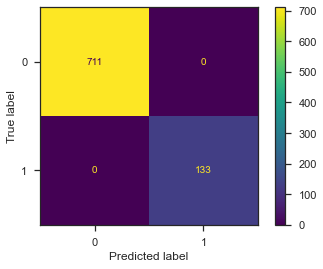

In [108]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=40, random_state=42)
clf_rf.fit(X_train_ros, y_train_ros)

clf_score(clf_rf, X_train_ros, y_train_ros, X_test, y_test, train=False)

### KNN

Validation Result:

accuracy score: 0.9597



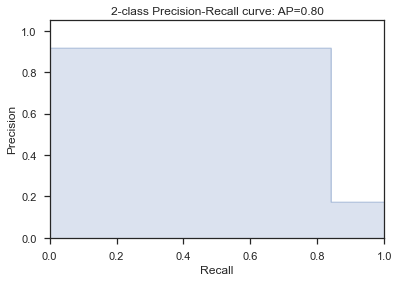

roc auc score: 0.9128212717675497



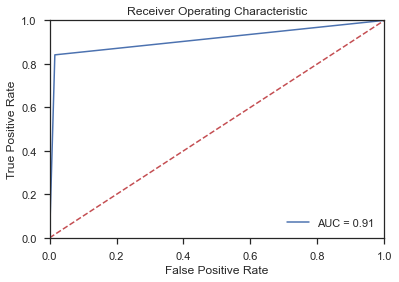

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       699
           1       0.92      0.84      0.88       145

    accuracy                           0.96       844
   macro avg       0.94      0.91      0.93       844
weighted avg       0.96      0.96      0.96       844


Confusion Matrix: 
 [[688  11]
 [ 23 122]]

End of validation Result



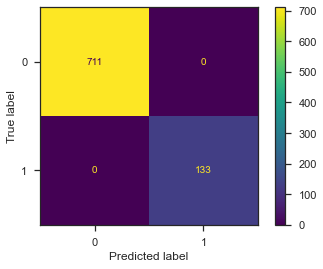

In [109]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn=RandomForestClassifier(n_estimators=40, random_state=42)
clf_knn.fit(X_train_ros, y_train_ros)

clf_score(clf_knn, X_train_ros, y_train_ros, X_test, y_test, train=False)

### XGBoost

[22:09:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Validation Result:

accuracy score: 0.8922



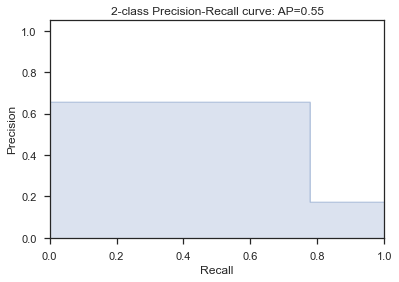

roc auc score: 0.8474520250604312



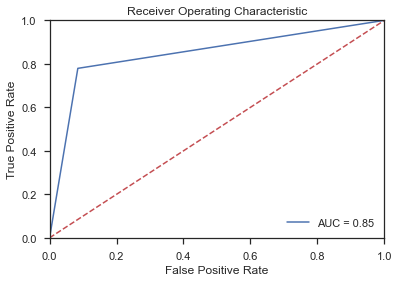

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       699
           1       0.66      0.78      0.71       145

    accuracy                           0.89       844
   macro avg       0.80      0.85      0.82       844
weighted avg       0.90      0.89      0.90       844


Confusion Matrix: 
 [[640  59]
 [ 32 113]]

End of validation Result



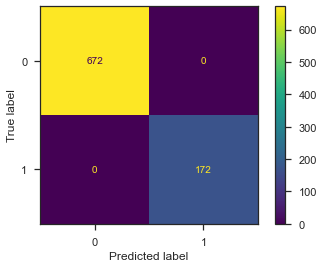

In [114]:
import xgboost as xgb

clf_xgb=xgb.XGBClassifier(random_state=1, learning_rate=0.01)
clf_xgb.fit(X_train_sm, y_train_sm)

clf_score(clf_xgb, X_train_sm, y_train_sm, X_test, y_test, train=False)

### AdaBoost

Validation Result:

accuracy score: 0.8329



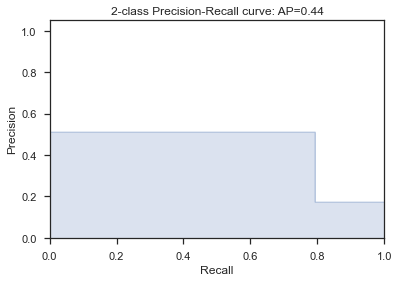

roc auc score: 0.8171525825070298



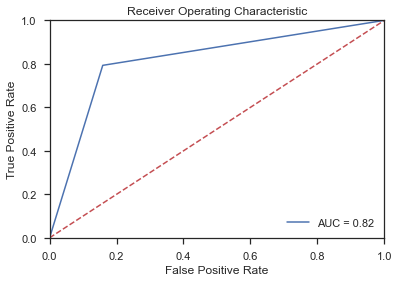

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       699
           1       0.51      0.79      0.62       145

    accuracy                           0.83       844
   macro avg       0.73      0.82      0.76       844
weighted avg       0.88      0.83      0.85       844


Confusion Matrix: 
 [[588 111]
 [ 30 115]]

End of validation Result



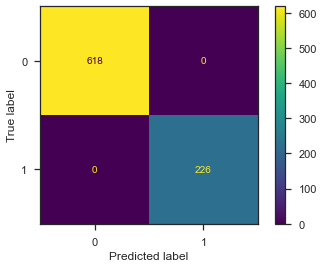

In [115]:
from sklearn.ensemble import AdaBoostClassifier

clf_ada_boost = AdaBoostClassifier(n_estimators=40, random_state=42)
clf_ada_boost.fit(X_train_ros, y_train_ros)

clf_score(clf_ada_boost, X_train_ros, y_train_ros, X_test, y_test, train=False)

### CatBoost

0:	learn: 0.5205159	total: 3.27ms	remaining: 3.27ms
1:	learn: 0.4704864	total: 6.34ms	remaining: 0us
class =  [1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 

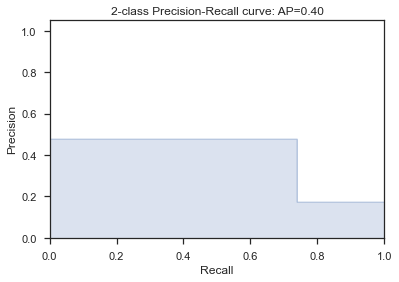

roc auc score: 0.7845592225346554



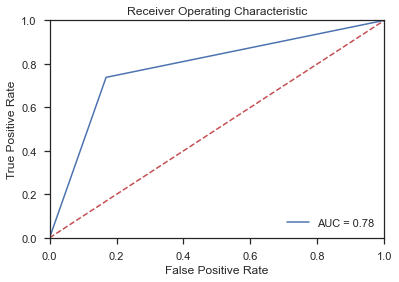

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.83      0.88       699
           1       0.48      0.74      0.58       145

    accuracy                           0.82       844
   macro avg       0.71      0.78      0.73       844
weighted avg       0.86      0.82      0.83       844


Confusion Matrix: 
 [[581 118]
 [ 38 107]]

End of validation Result



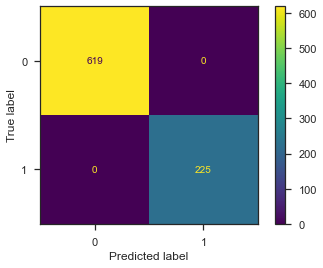

In [135]:
#!pip install catboost

from catboost import CatBoostClassifier, Pool

clf_cat_boost = CatBoostClassifier(iterations=2,
                                   depth=2,
                                   learning_rate=1,
                                   loss_function='Logloss',
                                   verbose=True)
# train the model
clf_cat_boost.fit(X_train_ros, y_train_ros)

# make the prediction using the resulting model
preds_class = clf_cat_boost.predict(X_test)
preds_proba = clf_cat_boost.predict_proba(X_test)
print("class = ", preds_class)
print("proba = ", preds_proba)

clf_score(clf_cat_boost, X_train_ros, y_train_ros, X_test, y_test, train=False)

### AutoKeras

In [118]:
! pip install autokeras==1.0.0b0

  Created wheel for autokeras: filename=autokeras-1.0.0b0-py3-none-any.whl size=48700 sha256=54b82483c2099e55e997c40d62735c8df9e564aa37407dddb69449f98a687725
  Stored in directory: c:\users\e_wor\appdata\local\pip\cache\wheels\0d\4e\98\8861de5bb5ac55c47c452a7dcea777ebd7b06bd8237fcdcb3d
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-py3-none-any.whl size=78936 sha256=bbadbd45a920bb3814c2aa17dd3428aab5cb4afa09d88d57268f2ff4ff40b205
  Stored in directory: c:\users\e_wor\appdata\local\pip\cache\wheels\53\3d\c3\160c686bd74a18989843fcd015e8f6954ca8d834fd2ef4658a
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15355 sha256=944206b70c9ef955d42710f1554be0291465f101c5b50f02437ab0cc158dcab1
  Stored in directory: c:\users\e_wor\appdata\local\pip\cache\wheels\08\8f\5f\253d0105a55bd84ee61ef0d37dbf70421e61e0cd70cef7c5e1
Successfully built autokeras keras-tuner terminaltables


In [120]:
import autokeras as ak

# It tries 10 different models.
clf_auto_keras = ak.StructuredDataClassifier(max_trials=10)
# Feed the structured data classifier with training data.
clf_auto_keras.fit(X_train_ros, y_train_ros)
# Predict with the best model.
predicted_y = clf_auto_keras.predict(X_test)
# Evaluate the best model with testing data.
print(clf_auto_keras.evaluate(X_test, y_test))


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
structured_data...|lightgbm          |?                 
light_gbm_1/lig...|5                 |?                 
light_gbm_1/lig...|0.6               |?                 
light_gbm_1/lig...|10                |?                 
light_gbm_1/lig...|0.105             |?                 
light_gbm_1/lig...|50                |?                 
optimizer         |adam              |?                 

Epoch 1/1000


AttributeError: in user code:

    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:758 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:387 update_state
        self.build(y_pred, y_true)
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:317 build
        self._metrics = nest.map_structure_up_to(y_pred, self._get_metric_objects,
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1159 map_structure_up_to
        return map_structure_with_tuple_paths_up_to(
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1257 map_structure_with_tuple_paths_up_to
        results = [
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1258 <listcomp>
        func(*args, **kwargs) for args in zip(flat_path_gen, *flat_value_gen)
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1161 <lambda>
        lambda _, *values: func(*values),  # Discards the path arg.
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:418 _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:418 <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:439 _get_metric_object
        y_t_rank = len(y_t.shape.as_list())

    AttributeError: 'tuple' object has no attribute 'shape'


Try different classifiers

DecisionTreeClassifier
Validation Result:

accuracy score: 0.9491



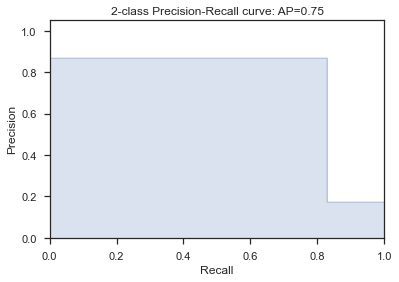

roc auc score: 0.9009175669675891



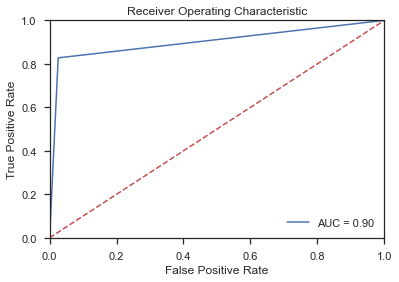

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       699
           1       0.87      0.83      0.85       145

    accuracy                           0.95       844
   macro avg       0.92      0.90      0.91       844
weighted avg       0.95      0.95      0.95       844


Confusion Matrix: 
 [[681  18]
 [ 25 120]]

End of validation Result

GaussianNB            
Validation Result:

accuracy score: 0.6161



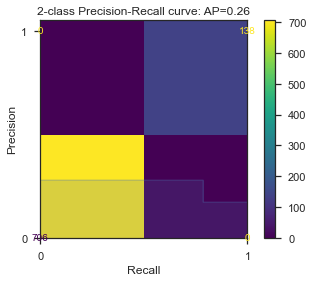

roc auc score: 0.6835183266735732



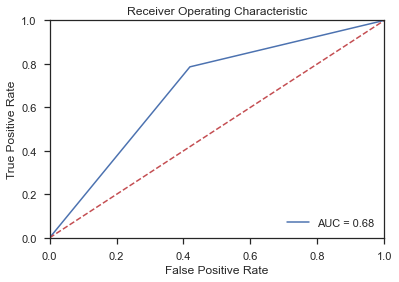

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.58      0.71       699
           1       0.28      0.79      0.41       145

    accuracy                           0.62       844
   macro avg       0.60      0.68      0.56       844
weighted avg       0.82      0.62      0.66       844


Confusion Matrix: 
 [[406 293]
 [ 31 114]]

End of validation Result

SVC                   
Validation Result:

accuracy score: 0.9171



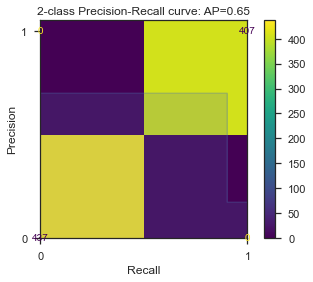

roc auc score: 0.9116669133244537



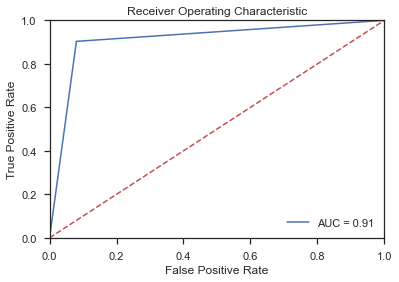

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       699
           1       0.70      0.90      0.79       145

    accuracy                           0.92       844
   macro avg       0.84      0.91      0.87       844
weighted avg       0.93      0.92      0.92       844


Confusion Matrix: 
 [[643  56]
 [ 14 131]]

End of validation Result

KNeighborsClassifier  
Validation Result:

accuracy score: 0.8756



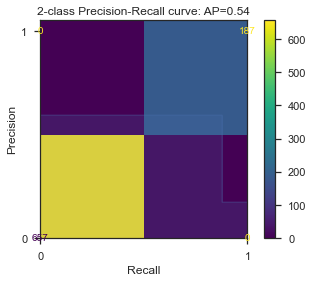

roc auc score: 0.8756992748261063



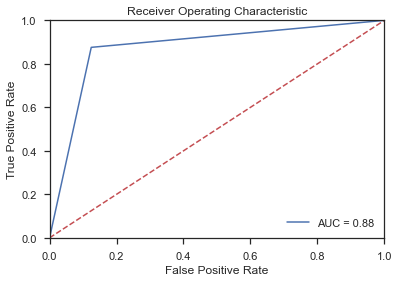

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       699
           1       0.59      0.88      0.71       145

    accuracy                           0.88       844
   macro avg       0.78      0.88      0.81       844
weighted avg       0.91      0.88      0.88       844


Confusion Matrix: 
 [[612  87]
 [ 18 127]]

End of validation Result



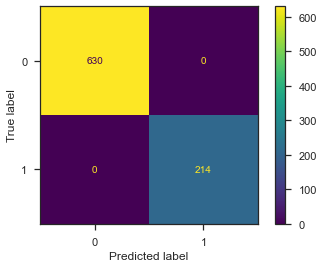

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

for model in [
    DecisionTreeClassifier,
    GaussianNB,
    SVC,
    KNeighborsClassifier,
]:
    clf = model()
    clf.fit(X_train_ros, y_train_ros)
    print(f"{model.__name__:22}")
    clf_score(clf, X_train_ros, y_train_ros, X_test, y_test, train=False)

# 4 - MODEL SELECTION AND TUNING

### Compare Models

In [143]:
model_comparison = {'Model':['Logistic Regression','Random Forest','KNN','XGBoost','AdaBoost','CatBoost'],
                 'Accuracy': [accuracy_score(y_test, clf_log_reg.predict(X_test)),
                             accuracy_score(y_test, clf_rf.predict(X_test)),
                             accuracy_score(y_test, clf_knn.predict(X_test)),
                             accuracy_score(y_test, clf_xgb.predict(X_test)),
                             accuracy_score(y_test, clf_ada_boost.predict(X_test)),
                             accuracy_score(y_test, clf_cat_boost.predict(X_test))],}
                 #'AUC-ROC': [lasso_r2,ridge_r2,mars_r2,tree_r2,knn_r2,rf_r2,gbt_r2,ann_r2]}


#mse_comparison = pd.DataFrame(mse_comparison)
#mse_comparison

plt.figure(figsize=(15,8))
sns.barplot(x="Model", y="Score", data=mse_comparison, palette='Purples')

ValueError: Could not interpret input 'Score'

<Figure size 1080x576 with 0 Axes>

### Model Selection

The best performing model is...

In [134]:
accuracy_score(y_test, clf_xgb.predict(X_test))

0.8921800947867299